In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

pd.set_option("display.max_columns", 50)

In [2]:
# Loading the dataset

housing = pd.read_csv("data/train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data cleaning

In [3]:
# Identifying the columns with high percentage of null values

null_cols = housing.isnull().sum()

null_perc = null_cols[null_cols > 0] / len(housing) 
to_drop = null_perc[null_perc > .9].index
to_drop

Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')

In [4]:
# Dropping the colums with high percentage of null values

housing = housing.drop(to_drop, axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Identifying the important numerical columns and extract them as features

In [5]:
# Selecting only the numerical columns

housing_num = housing.select_dtypes(include=['float64', "int64"])
housing_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


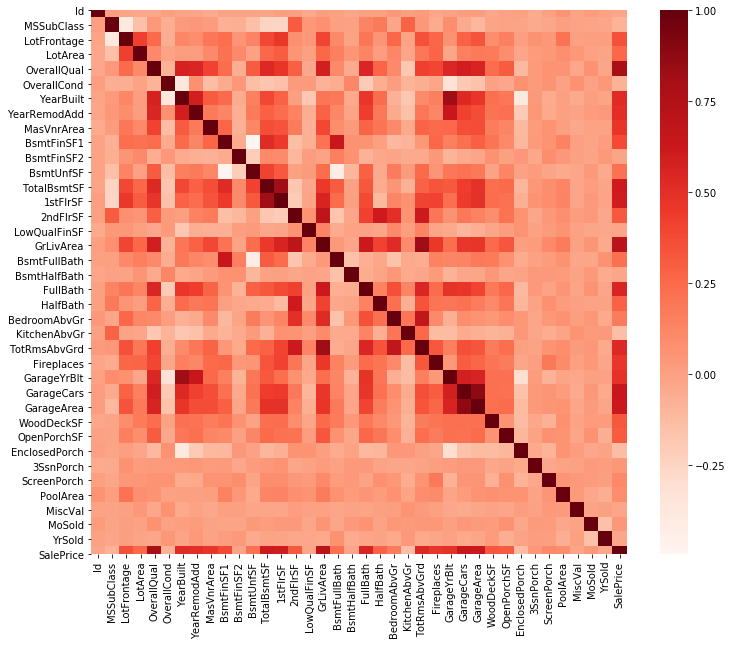

In [6]:
# Using Pearson Correlation

plt.figure(figsize=(12, 10))
cor = housing_num.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [7]:
# Correlation with Sale Price

cor_target = abs(cor["SalePrice"])

# Selecting highly correlated features
relevant_features = cor_target[(cor_target > 0.5) & (cor_target != 1)]  
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

In [8]:
# Making a subset of the dataset consisting of the high correlated continuous features

housing_num_cor = housing[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea",
                          "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]]

housing_num_cor.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


#### One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other.

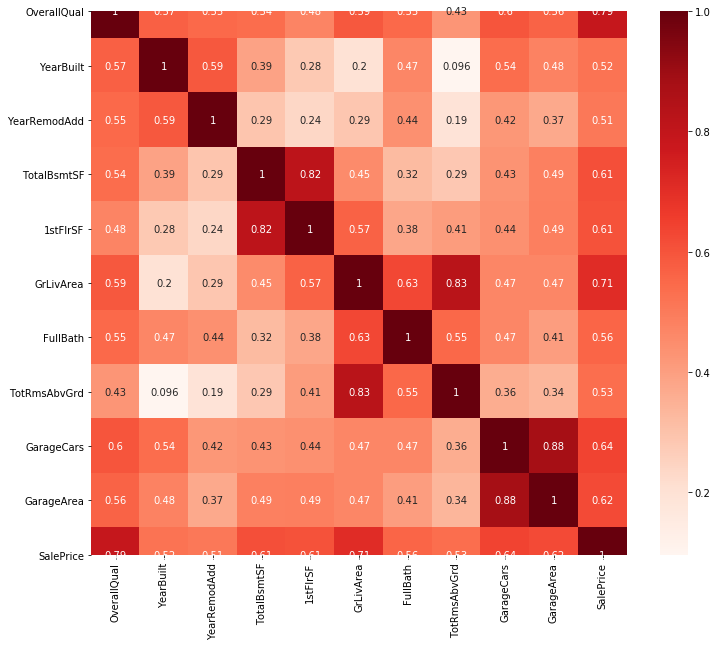

In [9]:
# So now let us check the correlations between the independent variables

plt.figure(figsize=(12,10))
cor = housing_num_cor.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### For example here we can see that the GrLivArea is highly correlated with TotRmsAbvGrd. Hence we would keep only one of these two and we would select GrLivArea because it has a higher correlation with SalePrice. The same procedure can be followed for the rest of the features

In [10]:
# Performing OLS test for all of the continuous features of our dataset individually

housing_num_cor = sm.add_constant(housing_num_cor)

for col in housing_num_cor.columns:
    
    if (col != "SalePrice"):
    
        y = housing_num_cor["SalePrice"]
        x = housing_num_cor[col]

        model = sm.OLS(y, x)
        result = model.fit()

        print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                nan
Time:                        18:43:59   Log-Likelihood:                -18544.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1459   BIC:                         3.710e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05   2079.105     87.019      0.0

/home/georgios/anaconda3/envs/data/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/georgios/anaconda3/envs/data/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


In [11]:
# OLS Test after reducing the features

housing_num_cor = sm.add_constant(housing_num_cor)



y = housing_num_cor["SalePrice"]
x = housing_num_cor[["OverallQual", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageCars"]]

model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              5995.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:44:00   Log-Likelihood:                         -17504.
No. Observations:                1460   AIC:                                  3.502e+04
Df Residuals:                    1454   BIC:                                  3.505e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [12]:
# Printing rsquared values for the continuous variables

for feature in housing_num_cor.columns:

    if (feature != "const" and feature != "SalePrice"):
    
        y = housing_num_cor["SalePrice"]
        x = housing_num_cor[feature]

        model = sm.OLS(y, x)
        result = model.fit()
    
        print(result.rsquared, feature)

0.9279382937990526 OverallQual
0.8441575823875127 YearBuilt
0.8422447079844252 YearRemodAdd
0.8841450338950562 TotalBsmtSF
0.8944132267821456 1stFlrSF
0.9186247985708571 GrLivArea
0.8808836812257934 FullBath
0.8842913407529965 TotRmsAbvGrd
0.8904337377001409 GarageCars
0.8791219822182306 GarageArea


## Identifying the categorical values of the dataset

In [13]:
housing_cat = housing.select_dtypes(include="object")
housing_cat["SalePrice"] = housing["SalePrice"]
housing_cat.columns

/home/georgios/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

## Creating dummies for every categorical feature in our dataset

In [14]:
# Here is a loop that creates dummies for every categorical feature and then tests the level of correlation
# The threshold chosen in 0.5 the same with continuous features


cat_corr = {}

df_dummies = []

for col in housing_cat.columns:
    
    if col == "SalePrice":
        break
    else:
        # Creating dummies for the columns
        df = pd.concat([housing_cat[col],pd.get_dummies(housing_cat[col], prefix=col)], axis=1)
        df_dummies.append(df)
    
        # Add the sale price to the DataFrame to perform the correlations
        df["SalePrice"] = housing["SalePrice"]
    
        # Correlations between the cat independetn variables and the continuous target SalePrice
        cor_cat = df.corr()
        cor_cat_target = abs(cor_cat["SalePrice"])
    
        # Finding the highest correlation of each group
        max_cor = cor_cat_target[(cor_cat_target != 1)].max()
        if max_cor > .5:
            cat_corr[col] = max_cor
            df_dummies.append(df)
        #print(f"{col} feature has {max_cor} correlation with the sale price")
cat_corr

{'ExterQual': 0.589043523409763,
 'BsmtQual': 0.5531048470089422,
 'KitchenQual': 0.5192978536548846}

In [15]:
dummy_ext_qual = pd.concat([housing_cat["ExterQual"],pd.get_dummies(housing_cat["ExterQual"], prefix="ExterQual")], axis=1)
dummy_ext_qual["SalePrice"] = housing_cat["SalePrice"]

dummy_bsmt_qual = pd.concat([housing_cat["BsmtQual"],pd.get_dummies(housing_cat["BsmtQual"], prefix="BsmtQual")], axis=1)
dummy_bsmt_qual["SalePrice"] = housing_cat["BsmtQual"]

dummy_kitch_qual = pd.concat([housing_cat["KitchenQual"],pd.get_dummies(housing_cat["KitchenQual"], prefix="KitchenQual")], axis=1)
dummy_kitch_qual["SalePrice"] = housing_cat["SalePrice"]

In [16]:
dummy_ext_qual.head()

,ExterQual,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SalePrice
0,Gd,0,0,1,0,208500
1,TA,0,0,0,1,181500
2,Gd,0,0,1,0,223500
3,TA,0,0,0,1,140000
4,Gd,0,0,1,0,250000


In [17]:
dummy_bsmt_qual.head()

,BsmtQual,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,SalePrice
0,Gd,0,0,1,0,Gd
1,Gd,0,0,1,0,Gd
2,Gd,0,0,1,0,Gd
3,TA,0,0,0,1,TA
4,Gd,0,0,1,0,Gd


In [18]:
dummy_kitch_qual.head()

,KitchenQual,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SalePrice
0,Gd,0,0,1,0,208500
1,TA,0,0,0,1,181500
2,Gd,0,0,1,0,223500
3,Gd,0,0,1,0,140000
4,Gd,0,0,1,0,250000


In [19]:
# Now since we only need one of the dummy to get our correlation witht the sale price we will reduce it more

housing_cat = housing_cat.assign(ext_qual_good = np.where(housing_cat["ExterQual"].str.contains("Gd"), 1, 0))
housing_cat = housing_cat.assign(bsmt_qual_good = np.where(housing_cat["BsmtQual"].str.contains("Gd"), 1, 0))
housing_cat = housing_cat.assign(kitch_qual_good = np.where(housing_cat["KitchenQual"].str.contains("Gd"), 1, 0))

housing_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice,ext_qual_good,bsmt_qual_good,kitch_qual_good
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,208500,1,1,1
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,181500,0,1,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,223500,1,1,1
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml,140000,0,0,1
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,250000,1,1,1


In [20]:
# Add a constant to housing categorical features

housing_cat_cor = sm.add_constant(housing_cat)

In [21]:
# Perform OLS for exterior quality

y = housing_cat_cor["SalePrice"]
x = housing_cat_cor["ext_qual_good"]

model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              1240.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                   4.32e-197
Time:                        18:44:00   Log-Likelihood:                         -19426.
No. Observations:                1460   AIC:                                  3.885e+04
Df Residuals:                    1459   BIC:                                  3.886e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [22]:
# Perform OLS for basement quality

y = housing_cat_cor["SalePrice"]
x = housing_cat_cor["bsmt_qual_good"]

model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              1179.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                   7.19e-190
Time:                        18:44:00   Log-Likelihood:                         -19442.
No. Observations:                1460   AIC:                                  3.889e+04
Df Residuals:                    1459   BIC:                                  3.889e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [23]:
# Perform OLS for kitchen quality

y = housing_cat_cor["SalePrice"]
x = housing_cat_cor["kitch_qual_good"]

model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.463
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              1256.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                   5.61e-199
Time:                        18:44:00   Log-Likelihood:                         -19421.
No. Observations:                1460   AIC:                                  3.884e+04
Df Residuals:                    1459   BIC:                                  3.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [24]:
# Perform OLS for exterior quality

y = housing_cat_cor["SalePrice"]
x = housing_cat_cor["ext_qual_good"]

model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              1240.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                   4.32e-197
Time:                        18:44:00   Log-Likelihood:                         -19426.
No. Observations:                1460   AIC:                                  3.885e+04
Df Residuals:                    1459   BIC:                                  3.886e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [25]:
final_cat = housing_cat_cor[["ext_qual_good", "bsmt_qual_good", "kitch_qual_good", "SalePrice"]]
final_num = housing_num_cor[["OverallQual", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageCars"]]

In [26]:
final_df = pd.concat([final_cat, final_num], axis=1)

In [27]:
final_df

,ext_qual_good,bsmt_qual_good,kitch_qual_good,SalePrice,OverallQual,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars
0,1,1,1,208500,7,2003,856,856,1710,2
1,0,1,0,181500,6,1976,1262,1262,1262,2
2,1,1,1,223500,7,2002,920,920,1786,2
3,0,0,1,140000,7,1970,756,961,1717,3
4,1,1,1,250000,8,2000,1145,1145,2198,3
...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,175000,6,2000,953,953,1647,2
1456,0,1,0,210000,6,1988,1542,2073,2073,2
1457,0,0,1,266500,7,2006,1152,1188,2340,1
1458,0,0,1,142125,5,1996,1078,1078,1078,1


In [28]:
# Final OLS with the highest correlated regressors
# Removed kitchen quality as it presented high pvalue

final_df = sm.add_constant(final_df)

y = final_df["SalePrice"]
x = final_df[["OverallQual", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageCars", 
             "ext_qual_good", "bsmt_qual_good"]]

model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              4515.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:44:00   Log-Likelihood:                         -17500.
No. Observations:                1460   AIC:                                  3.502e+04
Df Residuals:                    1452   BIC:                                  3.506e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------